# **Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. 

Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge. In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines
which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.I will solve the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions.


#  **Importing Libraries**

In [2]:
#Importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2

from sklearn.model_selection import train_test_split

#Deep Learning 
import tensorflow as tf
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.layers import Dense,Input,Dropout, GlobalAveragePooling2D,Flatten,Conv2D, BatchNormalization,Activation,MaxPooling2D
from keras.models import load_model,Model,Sequential
from keras.optimizers import Adam,SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils

# **Loading Dataset path**

In [3]:
dataset_path ="../input/fer13-cleaned-dataset/"

**Checking the emotions provided by the dataset**

In [4]:
# Print all the emotions
dirs = os.listdir(dataset_path )
print(dirs)

['fear', 'Angry', 'Neutral', 'disgust', 'Happy']


Dataset has provided 5 emotions

**Checking number of images provided per emotion**

In [5]:
total_images = 0
for dir_ in os.listdir(dataset_path):
    count = 0
    for f in os.listdir(dataset_path + dir_ + "/"):
        count += 1
        total_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal images are {total_images}")

fear has 2535 number of images
Angry has 2832 number of images
Neutral has 4295 number of images
disgust has 380 number of images
Happy has 6834 number of images

total images are 16876


As we see from above values, the emotion 'disgust' has been provided with very lesser images than other emotions. So our model could not able to learn this emotion properly. So removing this emotion could be the better option

# **Plotting some images of each emotion**

In [6]:
def plot_images(expression):
    expression = expression
    pic_size = 48
    plt.figure(figsize=(10,10))    
    for i in range(1,7,1):
        plt.subplot(6,6,i)
        img=load_img(dataset_path +expression+"/"+
                    os.listdir(dataset_path  + expression)[i],target_size=(pic_size,pic_size))
        plt.imshow(img)
    plt.show()


fear 



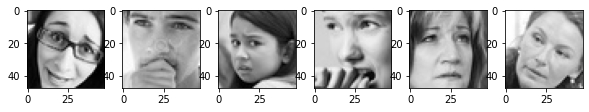

Angry 



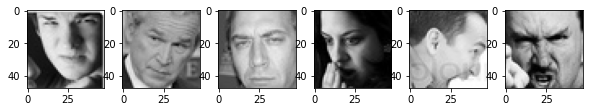

Neutral 



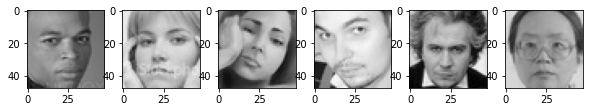

disgust 



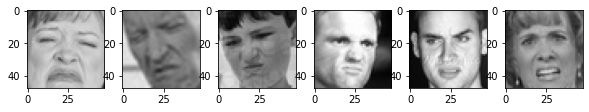

Happy 



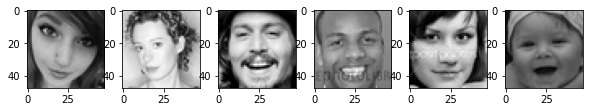

In [7]:
emotions_ = ['fear', 'Angry', 'Neutral', 'disgust', 'Happy']
for i in emotions_:
    print(i,"\n")
    plot_images(i)

# **Preprocessing the given images**

**Excluding images of disgust**

In [8]:
emotions =  ['fear', 'Angry', 'Neutral', 'Happy']

After excluding images(380) of disgust, we left with 16496 (16876-380=16496) images

In [9]:
total_images -= 380
total_images

16496

# **Converting images to array**

In [10]:
img_arr = np.empty(shape=(total_images,48,48,3))
img_label = np.empty(shape=(total_images))
label_to_text = {}

i,j = 0, 0
for emtn in os.listdir(dataset_path):
    if emtn in emotions:
        label_to_text[j] = emtn
        for image in os.listdir(dataset_path + emtn + "/"):
            img_arr[i] = cv2.imread(dataset_path + emtn + "/" + image)
            img_label[i] = j
            i += 1
        j += 1


**Array of first image**

In [11]:
img_arr[0]

array([[[241., 241., 241.],
        [240., 240., 240.],
        [239., 239., 239.],
        ...,
        [240., 240., 240.],
        [236., 236., 236.],
        [237., 237., 237.]],

       [[241., 241., 241.],
        [239., 239., 239.],
        [246., 246., 246.],
        ...,
        [239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.]],

       [[236., 236., 236.],
        [250., 250., 250.],
        [206., 206., 206.],
        ...,
        [237., 237., 237.],
        [236., 236., 236.],
        [237., 237., 237.]],

       ...,

       [[110., 110., 110.],
        [111., 111., 111.],
        [111., 111., 111.],
        ...,
        [242., 242., 242.],
        [182., 182., 182.],
        [ 93.,  93.,  93.]],

       [[109., 109., 109.],
        [111., 111., 111.],
        [113., 113., 113.],
        ...,
        [230., 230., 230.],
        [240., 240., 240.],
        [180., 180., 180.]],

       [[111., 111., 111.],
        [112., 112., 112.],
        [114., 1

In [12]:
img_arr.shape

(16496, 48, 48, 3)

In [13]:
img_label.shape

(16496,)

In [14]:
label_to_text

{0: 'fear', 1: 'Angry', 2: 'Neutral', 3: 'Happy'}

# **Normalizing the arrays**

Since our images are converted into arrays which has values ranging from 0 to 255 (8 bit i.e, 2**8 = 256) , we are normalizing the data by dividing with 255 

In [15]:
img_arr = img_arr/255

# **One-hot encoding**

In [16]:
np.unique(img_label, return_counts=True)

(array([0., 1., 2., 3.]), array([2535, 2832, 4295, 6834]))

In [17]:
img_label_1he = np_utils.to_categorical(img_label, num_classes = 4)

In [18]:
img_label_1he.shape

(16496, 4)

1. Indices 0-2534 belongs to fear
2. Indices 2535-5366 belongs to Angry
3. Indices 5367-9661 belongs to Neutral
4. Indices 9662-16495 belongs to Happy

In [19]:
img_label_1he[0],img_label_1he[2534]

(array([1., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32))

In [20]:
img_label_1he[2535],img_label_1he[5366]

(array([0., 1., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32))

In [21]:
img_label_1he[5367],img_label_1he[9661]

(array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32))

In [22]:
img_label_1he[9662],img_label_1he[16495]

(array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32))

# **Splitting the data into training and test sets**

In [23]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(img_arr, img_label_1he,test_size = 0.1,shuffle=True, stratify=img_label,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14846, 48, 48, 3), (1650, 48, 48, 3), (14846, 4), (1650, 4))

# **Model_1 building**

While model building the layers using are four convolutional and two fully connected

In [24]:
# Let's create a model to fit on the training data and evaluate on the test set

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_1 = tf.keras.Sequential()

no_of_classes=4

# Layer - 1
model_1.add(Conv2D(64,(3,3),padding='same', input_shape=(48,48,3)) )
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

# Layer - 2
model_1.add(Conv2D(128,(5,5),padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(.25))

# Layer - 3
model_1.add(Conv2D(512,(3,3), padding=('same')))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

# Layer - 4
model_1.add(Conv2D(512,(3,3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())

# Fully connected Layer - 1
model_1.add(Dense(256))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

# Fully connected Layer - 2
model_1.add(Dense(512))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Dropout(0.25))

model_1.add(Dense(no_of_classes, activation='softmax'))



# **Model_1 Compiling and Fitting along with callback**

In [25]:
# 2. Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["accuracy"])

checkpoint_filepath = './'
model_1checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath+'model_1bestweights.h5', verbose=1,  
                                                               monitor='val_accuracy', mode='max', save_best_only=True)

# 3. Fit the model
# Model weights are saved at the end of every epoch, if it's the best seen so far
history_1 = model_1.fit(X_train, y_train, epochs=100, callbacks=[model_1checkpoint_callback])

Epoch 1/100
464/464 [==============================] - 13s 11ms/step - loss: 0.6049 - accuracy: 0.3903
Epoch 2/100
464/464 [==============================] - 5s 11ms/step - loss: 0.4678 - accuracy: 0.5234
Epoch 3/100
464/464 [==============================] - 5s 11ms/step - loss: 0.4027 - accuracy: 0.6067
Epoch 4/100
464/464 [==============================] - 5s 11ms/step - loss: 0.3722 - accuracy: 0.6482
Epoch 5/100
464/464 [==============================] - 5s 11ms/step - loss: 0.3534 - accuracy: 0.6667
Epoch 6/100
464/464 [==============================] - 5s 11ms/step - loss: 0.3364 - accuracy: 0.6847
Epoch 7/100
464/464 [==============================] - 5s 11ms/step - loss: 0.3139 - accuracy: 0.7144
Epoch 8/100
464/464 [==============================] - 5s 12ms/step - loss: 0.3097 - accuracy: 0.7179
Epoch 9/100
464/464 [==============================] - 5s 11ms/step - loss: 0.2920 - accuracy: 0.7441
Epoch 10/100
464/464 [==============================] - 5s 11ms/step - loss: 0.28

**Saving the model_1 with best weights**

In [26]:
model_1.save("./model_1bestweights.h5")

**Evaluating the Trained model (model_1) with test dataset**

In [27]:
# Evaluate model_1 on test dataset
model_1.evaluate(X_test, y_test)

52/52 [==============================] - 1s 5ms/step - loss: 0.5784 - accuracy: 0.7073


[0.5783935189247131, 0.7072727084159851]

# **Important Note**
Training accuracy = **98%**

Testing accuracy  = **74%**

From the above results we can say that our model_1 is **Overfitted**


# **Model_2 building**

While building model_2 along with model_1 Imagedatagenerator is going to use to perform Data Augmentation

In [49]:
# Let's create another model(where datda augmentation is used) to fit on the training data and evaluate on the test set

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_2 = tf.keras.Sequential()

no_of_classes=4

# Layer - 1
model_2.add(Conv2D(64,(3,3),padding='same', input_shape=(48,48,3)) )
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

# Layer - 2
model_2.add(Conv2D(128,(5,5),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(.25))

# Layer - 3
model_2.add(Conv2D(512,(3,3), padding=('same')))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

# Layer - 4
model_2.add(Conv2D(512,(3,3), padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())

# Fully connected Layer - 1
model_2.add(Dense(256))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.25))

# Fully connected Layer - 2
model_2.add(Dense(512))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.25))

model_2.add(Dense(no_of_classes, activation='softmax'))

**Using ImageDataGenerator**

In [50]:
train_datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.15,
                                   height_shift_range=0.15, shear_range=0.15, 
                                   zoom_range=0.15, horizontal_flip=True,
                                   zca_whitening=False)
train_datagen.fit(X_train)

In [51]:
# 2. Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["accuracy"])

checkpoint_filepath = './'
model_2checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath+'model_2bestweights.h5', verbose=1,  
                                                               monitor='val_accuracy', mode='max', save_best_only=True)


batch_size = 1024
# 3. Fit the model with the augmented data
history_2 = model_2.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),epochs=250,
                        callbacks=[model_2checkpoint_callback], 
                        steps_per_epoch=len(X_train) / batch_size,
                                  use_multiprocessing=True)



Epoch 1/250
14/14 [==============================] - 13s 830ms/step - loss: 0.8118 - accuracy: 0.3351
Epoch 2/250
14/14 [==============================] - 19s 1s/step - loss: 0.5593 - accuracy: 0.3965
Epoch 3/250
14/14 [==============================] - 18s 1s/step - loss: 0.5445 - accuracy: 0.4146
Epoch 4/250
14/14 [==============================] - 19s 1s/step - loss: 0.5378 - accuracy: 0.4130
Epoch 5/250
14/14 [==============================] - 19s 1s/step - loss: 0.5380 - accuracy: 0.4130
Epoch 6/250
14/14 [==============================] - 18s 1s/step - loss: 0.5339 - accuracy: 0.4136
Epoch 7/250
14/14 [==============================] - 18s 1s/step - loss: 0.5256 - accuracy: 0.4177
Epoch 8/250
14/14 [==============================] - 18s 1s/step - loss: 0.5256 - accuracy: 0.4200
Epoch 9/250
14/14 [==============================] - 19s 1s/step - loss: 0.5193 - accuracy: 0.4363
Epoch 10/250
14/14 [==============================] - 18s 1s/step - loss: 0.5116 - accuracy: 0.4556
Epoch 

In [52]:
model_2.save("./model_2bestweights.h5")

In [53]:
# Evaluate model_2 on test dataset
model_2.evaluate(X_test, y_test)

52/52 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.7418


[0.4060544967651367, 0.7418181896209717]

**After doing some experiments , the results are as follows:**

With learning rate = 0.01
1. With epochs = 100,training accuracy = 80% and validation accuracy = 63%
2. With epochs = 150, training accuracy = 86% and validation accuracy = 74%
3. With epochs = 250, training accuracy = 90% and validation accuracy = 74.2%



# **Model_3 building**

In [54]:
# Let's create another model(where datda augmentation and learning rate(=0.001) is used ) to fit on the training data and evaluate on the test set

# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model_3 = tf.keras.Sequential()

no_of_classes=4

# Layer - 1
model_3.add(Conv2D(64,(3,3),padding='same', input_shape=(48,48,3)) )
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))

# Layer - 2
model_3.add(Conv2D(128,(5,5),padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(.35))

# Layer - 3
model_3.add(Conv2D(512,(3,3), padding=('same')))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))

# Layer - 4
model_3.add(Conv2D(512,(3,3), padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.35))

model_3.add(Flatten())

# Fully connected Layer - 1
model_3.add(Dense(256))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.35))

# Fully connected Layer - 2
model_3.add(Dense(512))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(Dropout(0.35))

model_3.add(Dense(no_of_classes, activation='softmax'))

In [55]:
train_datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.15,
                                   height_shift_range=0.15, shear_range=0.15, 
                                   zoom_range=0.15, horizontal_flip=True,
                                   zca_whitening=False)
train_datagen.fit(X_train)

In [56]:
# 2. Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

checkpoint_filepath = './'
model_3checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath+'model_2bestweights.h5', verbose=1,  
                                                               monitor='val_accuracy', mode='max', save_best_only=True)


batch_size = 512
# 3. Fit the model with the augmented data
history_3 = model_3.fit(train_datagen.flow(X_train, y_train, batch_size=batch_size),epochs=250,
                        callbacks=[model_3checkpoint_callback], 
                        steps_per_epoch=len(X_train) / batch_size,
                                  use_multiprocessing=True)

Epoch 1/250
28/28 [==============================] - 14s 397ms/step - loss: 0.7089 - accuracy: 0.3135
Epoch 2/250
28/28 [==============================] - 13s 447ms/step - loss: 0.5768 - accuracy: 0.3826
Epoch 3/250
28/28 [==============================] - 12s 408ms/step - loss: 0.5628 - accuracy: 0.3837
Epoch 4/250
28/28 [==============================] - 13s 439ms/step - loss: 0.5496 - accuracy: 0.4091
Epoch 5/250
28/28 [==============================] - 15s 514ms/step - loss: 0.5345 - accuracy: 0.4338
Epoch 6/250
28/28 [==============================] - 13s 430ms/step - loss: 0.5236 - accuracy: 0.4449
Epoch 7/250
28/28 [==============================] - 16s 550ms/step - loss: 0.5144 - accuracy: 0.4646
Epoch 8/250
28/28 [==============================] - 12s 423ms/step - loss: 0.4814 - accuracy: 0.5125
Epoch 9/250
28/28 [==============================] - 13s 438ms/step - loss: 0.4690 - accuracy: 0.5190
Epoch 10/250
28/28 [==============================] - 12s 421ms/step - loss: 0.454

In [57]:
# Evaluate model_2 on test dataset
model_3.evaluate(X_test, y_test)

52/52 [==============================] - 0s 5ms/step - loss: 0.3184 - accuracy: 0.7461


[0.31837332248687744, 0.7460606098175049]

In [58]:
model_3.save("./model_3bestweights.h5")

With batch_size = 1024, learning rate = 0.001,
1. With epochs = 100, training accuracy = 76% and validation accuracy = 66%

With batch_size = 512, learning_rate = 0.001
1. epochs = 250, training accuracy = 85% and validation accuracy = 75%


**Best model out of 3 models built**

Considering training accuracy anad validation accuracy, model_2 could be the best option which has training accuracy is 90% and testing accurasy is 74.2%

# **Plotting Training Accuracy and Loss for model_2**

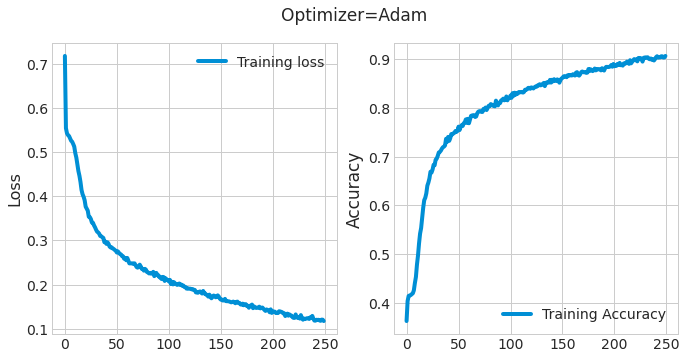

In [67]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('Optimizer=Adam', fontsize=17)
plt.ylabel('Loss',fontsize=16)
plt.plot(history_2.history['loss'],label='Training loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy', fontsize=17)
plt.plot(history_2.history['accuracy'],label='Training Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Summary**

1. Model_1 has got training accuracy = 98% and validation accuracy = 74%, which means model is overfitted

2. Model_2: Here Data Augmentation has been used and below shown  are the results obtained

     With learning rate = 0.01
        1. With epochs = 100,training accuracy = 80% and validation accuracy = 63%
        2. With epochs = 150, training accuracy = 86% and validation accuracy = 74%
        3. With epochs = 250, training accuracy = 90% and validation accuracy = 74.2%

  
        
3. Model_3 :Here Data Augmentation has been used and below shown are the results obtained

        With learning rate = 0.001, batch size = 1024
         1. With epochs = 100, training accuracy = 76% and validation accuracy = 66% 
        
        With learning rate = 0.001, batch size = 512
         1. With epochs = 250, training accuracy = 85% and validation accuracy = 75%
        
4. All 3 models are built with four convolutional and two fully connected layers        